### 3.2 Classification and regression with a two-layer perceptron

#### 3.2.3 Function approximation

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm

In [17]:
def error_mse(T, Y):
    #return np.sum((T - Y) ** 2) / 2
    return np.mean(((Y-T)**2))

def accuracy(T, Y):
    #return np.sum((T - Y) ** 2) / 2
    return np.sum(abs(T-Y)/2)/len(T)

def phi(x):
    return 2/(1+np.exp(-x))-1


def phi_prime(x):
    return 0.5*((1+phi(x))*(1-phi(x)))

def forward_pass(X,W,V):
    #print(W.shape)
    #print(X.shape)
    H = phi(np.matmul(W,X))
    #print(H.shape)
    H=np.vstack([H,np.ones(np.shape(H)[1])])
    #print(H.shape)
    #print(V.shape)
    O = phi(np.matmul(V,H))
    #print(O.shape)
    return H,O

def backward_pass(O,T,H,V,hidden):
    delta_o = np.multiply((O-T),phi_prime(O))
    #print("hej hopp")
    #print(V.shape)
    #print(delta_y.shape)
    #print(phi_prime(H).shape)
    delta_h = np.multiply(np.matmul(np.transpose(V),delta_o),phi_prime(H))
    delta_h = delta_h[0:hidden]
    return delta_o, delta_h

def update_weights(X,H,W,V,eta,delta_o, delta_h,dw,dv,alpha):
    dw = alpha*dw-(1-alpha)*np.matmul(delta_h,np.transpose(X))
    dv = alpha*dv - (1-alpha)*np.matmul(delta_o,np.transpose(H))
    W = W + dw*eta
    V = V + dv*eta
    return W,V,dw,dv

def backprop(eta,X,T,W,V,hidden,epochs,alpha=0.9):
    weights1 = []
    weights2 = []
    mse_errors = []
    accuracys = []
    #acc = 0
    dw = np.ones(W.shape)
    dv = np.ones(V.shape)
    #print(eta,X,T,W,V,hidden,epochs)
    for i in range(epochs):
        weights1.append(W)
        weights2.append(V)
        H,O = forward_pass(X,W,V)
        mse = error_mse(T,O)
        mse_errors.append(mse)
        acc = accuracy(T,O)
        accuracys.append(acc)
        delta_o,delta_h = backward_pass(O,T,H,V,hidden)
        W,V,dw,dv = update_weights(X,H,W,V,eta,delta_o,delta_h,dw,dv,alpha)
        #print(H)
        #print("print")
        #print(Y)
        
    weights1.append(W)
    weights2.append(V)
    
    return weights1, weights2,mse_errors,accuracys


In [18]:
def predict(validation,W,V, classification = True):
        #print(validation)
        _, prediction = forward_pass(validation,W,V)
        
        return prediction

(21, 21)


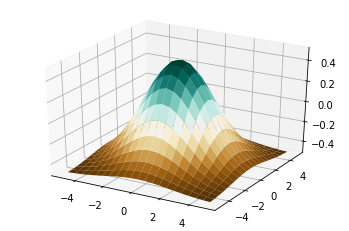

(3, 441)
(10001, 25, 3)
(10001, 1, 26)
-0.36513081598794045
(1, 441)


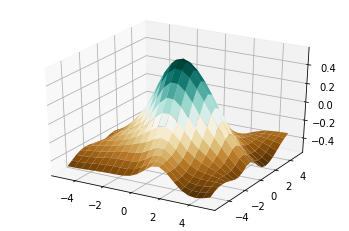

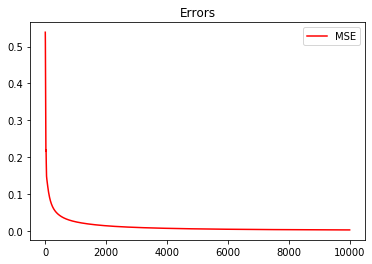

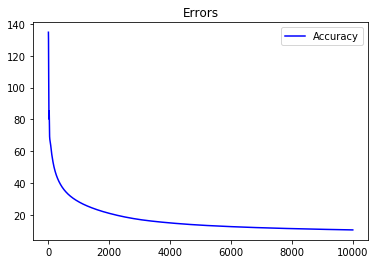

mse
acc


In [19]:


def f(X, Y):
    return np.exp(-X**2*0.1)*np.exp(-Y**2*0.1) - 0.5;

eta = 1e-4
#n_in = 8
n_out = 1
scale = 1
hidden_perceptrons = 25
epochs = 10000


x = np.arange(-5,5.5,0.5)
y = np.arange(-5,5.5,0.5)
#x = x.reshape(-1,1)
#y = y.reshape(-1,1)
#print(x.shape)

X, Y = np.meshgrid(x, y)
print(X.shape)
Z = f(X,Y)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Plot the surface.
plot = ax.plot_surface(X, Y, Z, cmap=cm.BrBG)
plt.show()


ndata = len(x)*len(y)
T = Z.reshape(1,ndata)

patterns = np.vstack([np.reshape(X,(1,ndata)),np.reshape(Y, (1,ndata))])
patterns = np.vstack([patterns,np.ones(patterns.shape[1])])

print(patterns.shape)
W = scale*np.random.randn(hidden_perceptrons,np.shape(patterns)[0])
V = scale*np.random.randn(n_out,hidden_perceptrons+1)

W_train,V_train,mse,acc = backprop(eta,patterns,T,W,V,hidden_perceptrons,epochs)
W_train = np.asarray(W_train)
V_train = np.asarray(V_train)
print(W_train.shape)
print(V_train.shape)
print(V_train[900,0,1])
_, prediction = forward_pass(patterns,W_train[epochs-1,:,:],V_train[epochs-1,:,:])
print(prediction.shape)
prediction = prediction.reshape(len(x),len(y))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Plot the surface.
plot = ax.plot_surface(X, Y, prediction, cmap=cm.BrBG)
plt.show()
plt_mse, = plt.plot(np.linspace(0,epochs,epochs),mse,'r', label='MSE')
plt.legend(handles=[plt_mse])
#plt.axis([0,20,0,100])
plt.title('Errors')
plt.show()
plt_acc, = plt.plot(np.linspace(0,epochs,epochs),acc,'b',label='Accuracy')
plt.legend(handles=[plt_acc])
plt.title('Errors')
plt.show()

print("mse")
#print(mse)
print("acc")
#print(acc)

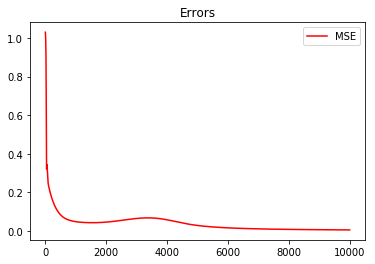

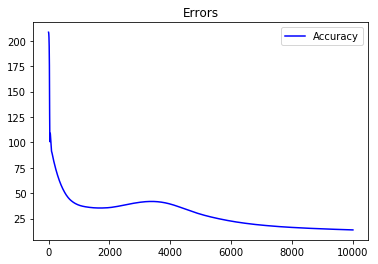

In [95]:
plt_mse, = plt.plot(np.linspace(0,epochs,epochs),mse,'r', label='MSE')
plt.legend(handles=[plt_mse])
#plt.axis([0,20,0,100])
plt.title('Errors')
plt.show()
plt_acc, = plt.plot(np.linspace(0,epochs,epochs),acc,'b',label='Accuracy')
plt.legend(handles=[plt_acc])
plt.title('Errors')
plt.show()

In [164]:
def generateData(train_split,val_split):
    def f(X, Y):
        return np.exp(-X**2*0.1)*np.exp(-Y**2*0.1) - 0.5;
    x = np.arange(-5,5.5,0.5)
    y = np.arange(-5,5.5,0.5)
    X, Y = np.meshgrid(x, y)
    Z = f(X,Y)
    
    ndata = len(x)*len(y)
    T = Z.reshape(1,ndata)

    patterns = np.vstack([np.reshape(X,(1,ndata)),np.reshape(Y, (1,ndata))])
    patterns = np.vstack([patterns,np.ones(patterns.shape[1])])
    
    i = np.arange(patterns.shape[1])
    np.random.shuffle(i)
    patterns = patterns[:,i]
    T = T[:,i]

    '''
    ######
    X = np.ravel(X)
    X = X[i]
    X_tmp = X[:int(train_split*X.shape[0])]
    X_test = X[int(train_split*X.shape[0])+1:-1]
    X_train = X_tmp[:int(val_split*X_tmp.shape[0])]
    X_val = X_tmp[int(val_split*X_tmp.shape[0])+1:-1]
    X.reshape((21,21))
    X_train.reshape(int(val_split*X_tmp.shape[0]))
    ######
    '''
    
    
    
    patterns_tmp = patterns[:,:int(train_split*patterns.shape[1])]
    patterns_test = patterns[:,int(train_split*patterns.shape[1])+1:-1]
    patterns_train = patterns_tmp[:,:int(val_split*patterns_tmp.shape[1])]
    patterns_val = patterns_tmp[:,int(val_split*patterns_tmp.shape[1])+1:-1]

    T_tmp = T[:,:int(train_split*T.shape[1])]
    T_test = T[:,int(train_split*T.shape[1])+1:-1]
    T_train = T_tmp[:,:int(val_split*T_tmp.shape[1])]
    T_val = T_tmp[:,int(val_split*T_tmp.shape[1])+1:-1]
    
    
    return X,Y,Z,patterns_train,patterns_val,patterns_test,T_train,T_val,T_test

#### Model Selection by studying validation error

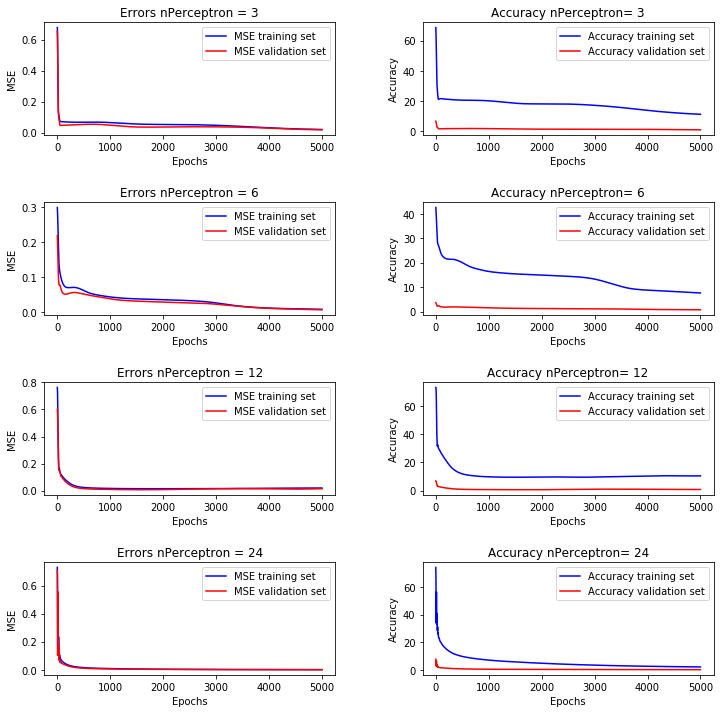

In [169]:
eta = 1e-3
#n_in = 8
n_out = 1
scale = 1
hidden_perceptrons = 25
epochs = 5000
train_split = 0.5
validation_split = 0.9

X,Y,Z,patterns_train,patterns_val,patterns_test,T_train,T_val,T_test = generateData(train_split,validation_split)

'''
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plot = ax.plot_surface(X, Y, Z, cmap=cm.BrBG)
plt.show()
'''


#Initialize weights
W = scale*np.random.randn(hidden_perceptrons,np.shape(patterns_train)[0])
V = scale*np.random.randn(n_out,hidden_perceptrons+1)

#train
W_train,V_train,mse,acc = backprop(eta,patterns_train,T_train,W,V,hidden_perceptrons,epochs)
W_train = np.asarray(W_train)
V_train = np.asarray(V_train)

'''
p = predict(patterns,W_train[epochs-1,:,:],V_train[epochs-1,:,:])
p = p.reshape(X.shape[1],Y.shape[0])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plot = ax.plot_surface(X, Y, p, cmap=cm.BrBG)
plt.show()
'''

###############
# Testing number of perceptrons in hidden layer for best model

hidden_perceptrons = [3,6,12,24]

mse_holder = np.zeros((len(hidden_perceptrons),epochs))
mse_val_holder = np.zeros((len(hidden_perceptrons),epochs))
acc_holder = np.zeros((len(hidden_perceptrons),epochs))
acc_val_holder = np.zeros((len(hidden_perceptrons),epochs))

for j,nP in enumerate(hidden_perceptron):
    
    #Initialize weights
    W = scale*np.random.randn(nP,np.shape(patterns_train)[0])
    V = scale*np.random.randn(n_out,nP+1)

    #train
    W_train,V_train,mse,acc = backprop(eta,patterns_train,T_train,W,V,nP,epochs)
    W_train = np.asarray(W_train)
    V_train = np.asarray(V_train)

    mse_val = []
    acc_val = []

    for i in range(1,W_train.shape[0]):
        p = predict(patterns_val,W_train[i,:,:],V_train[i,:,:])
        mse_val.append(error_mse(T_val,p))
        acc_val.append(accuracy(T_val,p))
    
    mse_holder[j,:] = np.array(mse)
    mse_val_holder[j,:] = np.array(mse_val)
    acc_holder[j,:] = np.array(acc)
    acc_val_holder[j,:] = np.array(acc_val)
    


fig, axs = plt.subplots(len(hidden_perceptrons),2, figsize=(12, 12))
fig.subplots_adjust(hspace = 0.6, wspace= 0.3)
axs = axs.ravel()
#print('axs',axs)

k = 0
for p in range(len(hidden_perceptron)):
    axs[p+k].plot(np.linspace(0,epochs,epochs),mse_holder[p,:],'b', label='MSE training set')
    axs[p+k].plot(np.linspace(0,epochs,epochs),mse_val_holder[p,:],'r', label='MSE validation set')
    axs[p+k].legend()
    axs[p+k].set_title('Errors nPerceptron = '+str(hidden_perceptron[p]))
    axs[p+k].set_xlabel('Epochs')
    axs[p+k].set_ylabel('MSE')
    
    axs[p+k+1].plot(np.linspace(0,epochs,epochs),acc_holder[p,:],'b', label='Accuracy training set')
    axs[p+k+1].plot(np.linspace(0,epochs,epochs),acc_val_holder[p,:],'r', label='Accuracy validation set')
    axs[p+k+1].legend()
    axs[p+k+1].set_title('Accuracy nPerceptron= '+str(hidden_perceptron[p]))
    axs[p+k+1].set_xlabel('Epochs')
    axs[p+k+1].set_ylabel('Accuracy')
    k+=1

plt.show()

#### Evaluating performance with varying size of training set

In [ ]:
splits = [0.8,0.6,0.4,0.2]
hidden_perceptrons = 12
epochs = 5000

for j,ratio in enumerate(splits):
    #Generate data
    X,Y,Z,patterns_train,patterns_val,patterns_test,T_train,T_val,T_test = generateData(ratio,1)
    
    #Initialize weights
    W = scale*np.random.randn(hidden_perceptrons,np.shape(patterns_train)[0])
    V = scale*np.random.randn(n_out,hidden_perceptrons+1)

    #train
    W_train,V_train,mse,acc = backprop(eta,patterns_train,T_train,W,V,hidden_perceptrons,epochs)
    W_train = np.asarray(W_train)
    V_train = np.asarray(V_train)
    
    mse_test = []
    acc_test = []

    for i in range(1,W_train.shape[0]):
        p = predict(patterns_test,W_train[i,:,:],V_train[i,:,:])
        mse_val.append(error_mse(T_test,p))
        acc_val.append(accuracy(T_test,p))
    
    mse_holder[j,:] = np.array(mse)
    mse_test_holder[j,:] = np.array(mse_test)
    acc_holder[j,:] = np.array(acc)
    acc_test_holder[j,:] = np.array(acc_test)


fig, axs = plt.subplots(len(hidden_perceptrons),2, figsize=(12, 12))
fig.subplots_adjust(hspace = 0.6, wspace= 0.3)
axs = axs.ravel()
#print('axs',axs)

k = 0
for p in range(len(hidden_perceptron)):
    axs[p+k].plot(np.linspace(0,epochs,epochs),mse_holder[p,:],'b', label='MSE training set')
    axs[p+k].plot(np.linspace(0,epochs,epochs),mse_val_holder[p,:],'r', label='MSE validation set')
    axs[p+k].legend()
    axs[p+k].set_title('Errors nPerceptron = '+str(hidden_perceptron[p]))
    axs[p+k].set_xlabel('Epochs')
    axs[p+k].set_ylabel('MSE')
    
    axs[p+k+1].plot(np.linspace(0,epochs,epochs),acc_holder[p,:],'b', label='Accuracy training set')
    axs[p+k+1].plot(np.linspace(0,epochs,epochs),acc_val_holder[p,:],'r', label='Accuracy validation set')
    axs[p+k+1].legend()
    axs[p+k+1].set_title('Accuracy nPerceptron= '+str(hidden_perceptron[p]))
    axs[p+k+1].set_xlabel('Epochs')
    axs[p+k+1].set_ylabel('Accuracy')
    k+=1

plt.show()
    